year     crime
2013 -> 2450084.6313476562
2014 -> 2495112.7729492188
2015 -> 2519862.0112304688



yellow points are the predicted ones


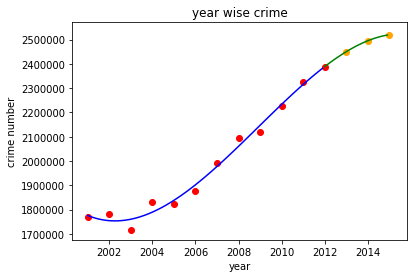

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('year_wise.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

x_fit=np.array([[2013.0],[2014.0],[2015.0]])
x_fit1=np.array([[2013.0],[2014.0],[2015.0]])
X_grid1 = np.arange(min(x_fit)-0.999, max(x_fit), 0.1)
X_grid1 = X_grid1.reshape((len(X_grid1), 1))
year=2013
print("year","   ","crime")
for i in (lin_reg_2.predict(poly_reg.fit_transform(x_fit1))):
    print(year,"->", i)
    year=year+1
print("\n\n\nyellow points are the predicted ones")
plt.scatter(X, y, color = 'red')
plt.scatter(x_fit, lin_reg_2.predict(poly_reg.fit_transform(x_fit)), color = 'orange')
plt.plot(X_grid1,lin_reg_2.predict(poly_reg.fit_transform(X_grid1)),color="green")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('year wise crime')
plt.xlabel('year')
plt.ylabel('crime number')
plt.show()


 



In [207]:
from sklearn.metrics import mean_squared_error

In [220]:

print(mean_squared_error(y,lin_reg_2.predict(poly_reg.fit_transform(X)), squared=False))

24747.10987066646


In [209]:

# n=int(input("enter the year for which you want to predict crime"))
# print(lin_reg_2.predict(poly_reg.fit_transform([[n]])))